In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential#orders data
from tensorflow.keras.layers import Dense,Flatten#flatten to single layer
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings("ignore")



In [67]:
#loading the Mnist dataset
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print("training set size:",xtrain.shape,ytrain.shape)
print("test set size:",xtest.shape,ytest.shape)

training set size: (60000, 28, 28) (60000,)
test set size: (10000, 28, 28) (10000,)


In [68]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [69]:
#numof classes
num_labels=len(np.unique(ytrain))
num_labels

10

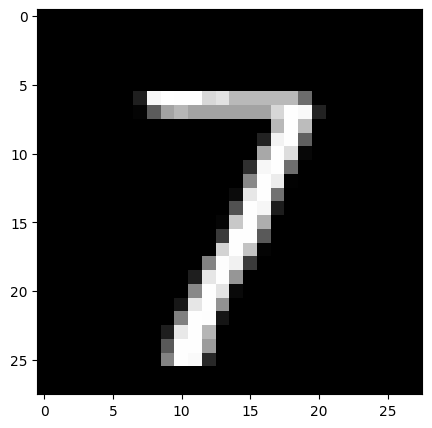

In [70]:
#show eg from dataset
plt.figure(figsize=(5,5))
plt.imshow(xtrain[560],cmap="grey")#imageshow


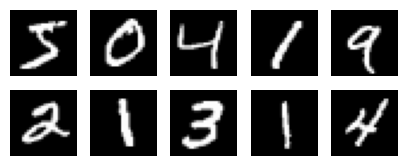

In [71]:
plt.figure(figsize=(5,5))
for i in range(0,10):#taking data from xtrain
    ax=plt.subplot(5,5,i+1)
    plt.imshow(xtrain[i],cmap="grey")
    plt.axis("off")

In [72]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,num):#taking data from xtrain
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap="grey")
        plt.axis("off")
    

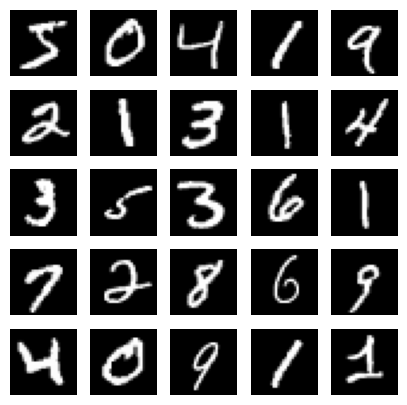

In [73]:
visualize_img(xtrain,25)

In [74]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="grey")
    width,height=img.shape
    threshold=img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(x,y),color="white" if img[x][y]< threshold else  "black")

    
    

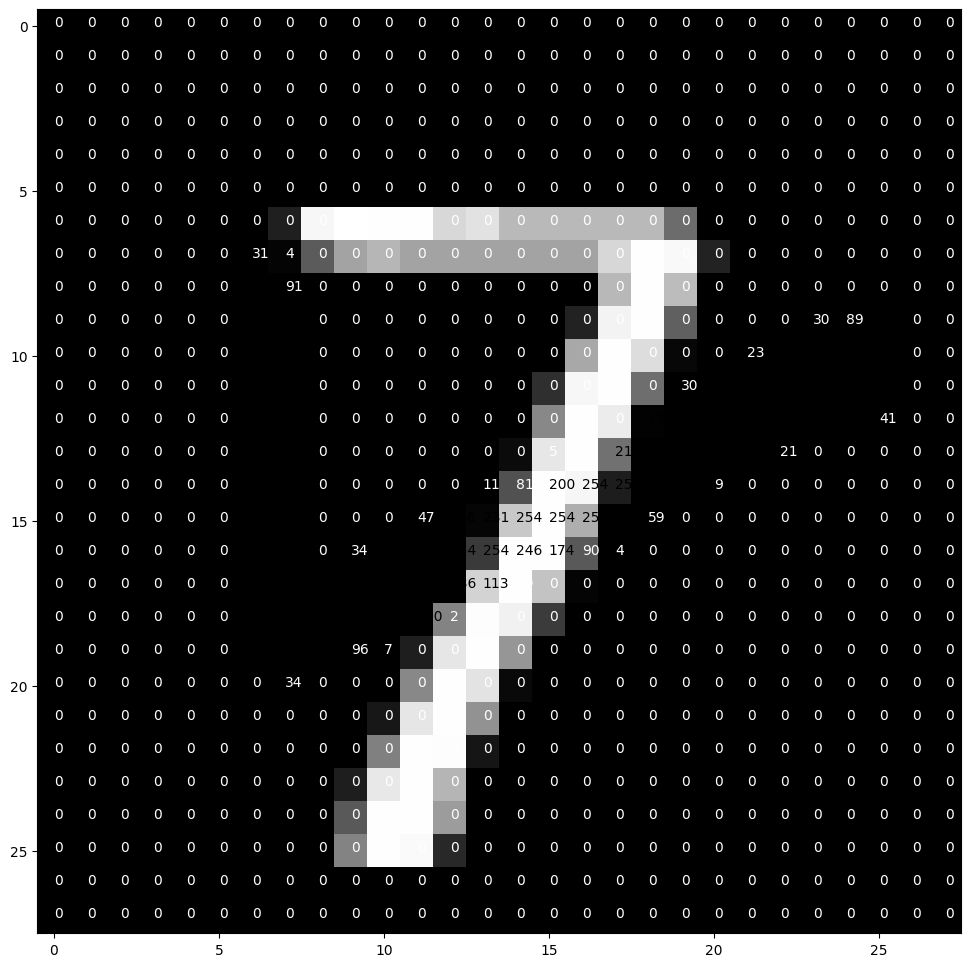

In [75]:
pixel_visualize(xtrain[560])

# data preparation

In [76]:
# encoding for dependent variable

In [77]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [78]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)#change to array

In [79]:
ytrain[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [80]:
#reshaping


In [81]:
image_size=xtrain.shape[1]
image_size

28

In [82]:
print(f"xtrain size:{xtrain.shape}\n\nxtest size:{xtest.shape}")

xtrain size:(60000, 28, 28)

xtest size:(10000, 28, 28)


In [83]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)#1 is no of channel



In [84]:
print(f"xtrain size:{xtrain.shape}\n\nxtest size:{xtest.shape}")

xtrain size:(60000, 28, 28, 1)

xtest size:(10000, 28, 28, 1)


In [85]:
#standardisation

In [86]:
xtrain=xtrain.astype("float")/255# whr 255 is max size/value of pixel
xtest=xtest.astype("float")/255




In [87]:
xtrain

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [88]:
xtest

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [89]:
#modelling

In [90]:
#defining nueral n/w archi

In [91]:
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation="relu",name="layer1"),#hiddden layer
    Dense(units=num_labels,activation="softmax",name="output_layer")])#o/p layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])
    


In [92]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
#model fit


In [94]:
model.fit(xtrain,ytrain,epochs=8,batch_size=128,validation_data=(xtest,ytest))#epoch=iteration

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8260 - loss: 0.6145 - precision_1: 0.9315 - recall_1: 0.7056 - val_accuracy: 0.9453 - val_loss: 0.1905 - val_precision_1: 0.9585 - val_recall_1: 0.9322
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9495 - loss: 0.1810 - precision_1: 0.9617 - recall_1: 0.9375 - val_accuracy: 0.9597 - val_loss: 0.1395 - val_precision_1: 0.9682 - val_recall_1: 0.9524
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9638 - loss: 0.1239 - precision_1: 0.9719 - recall_1: 0.9576 - val_accuracy: 0.9656 - val_loss: 0.1148 - val_precision_1: 0.9722 - val_recall_1: 0.9602
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9718 - loss: 0.0971 - precision_1: 0.9776 - recall_1: 0.9667 - val_accuracy: 0.9698 - val_loss: 0.1009 - val_precision_1: 0.9744 - val_recall_1: 0.9647
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9771 - loss: 0.0782 - precision_1: 0.9811 - recall_1: 0.9733 - val_

In [95]:
#model evaluation

In [96]:
history=model.fit(xtrain,ytrain,epochs=8,batch_size=128,validation_data=(xtest,ytest))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9901 - loss: 0.0371 - precision_1: 0.9916 - recall_1: 0.9886 - val_accuracy: 0.9784 - val_loss: 0.0734 - val_precision_1: 0.9815 - val_recall_1: 0.9771
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9927 - loss: 0.0300 - precision_1: 0.9940 - recall_1: 0.9913 - val_accuracy: 0.9767 - val_loss: 0.0761 - val_precision_1: 0.9790 - val_recall_1: 0.9749
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9941 - loss: 0.0249 - precision_1: 0.9947 - recall_1: 0.9930 - val_accuracy: 0.9785 - val_loss: 0.0744 - val_precision_1: 0.9807 - val_recall_1: 0.9770
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9946 - loss: 0.0212 - precision_1: 0.9953 - recall_1: 0.9938 - val_accuracy: 0.9775 - val_loss: 0.0776 - val_precision_1: 0.9794 - val_recall_1: 0.9760
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9956 - loss: 0.0194 - precision_1: 0.9964 - recall_1: 0.9951 - val_

Text(0.5, 1.0, 'training and test accuarcy graph')

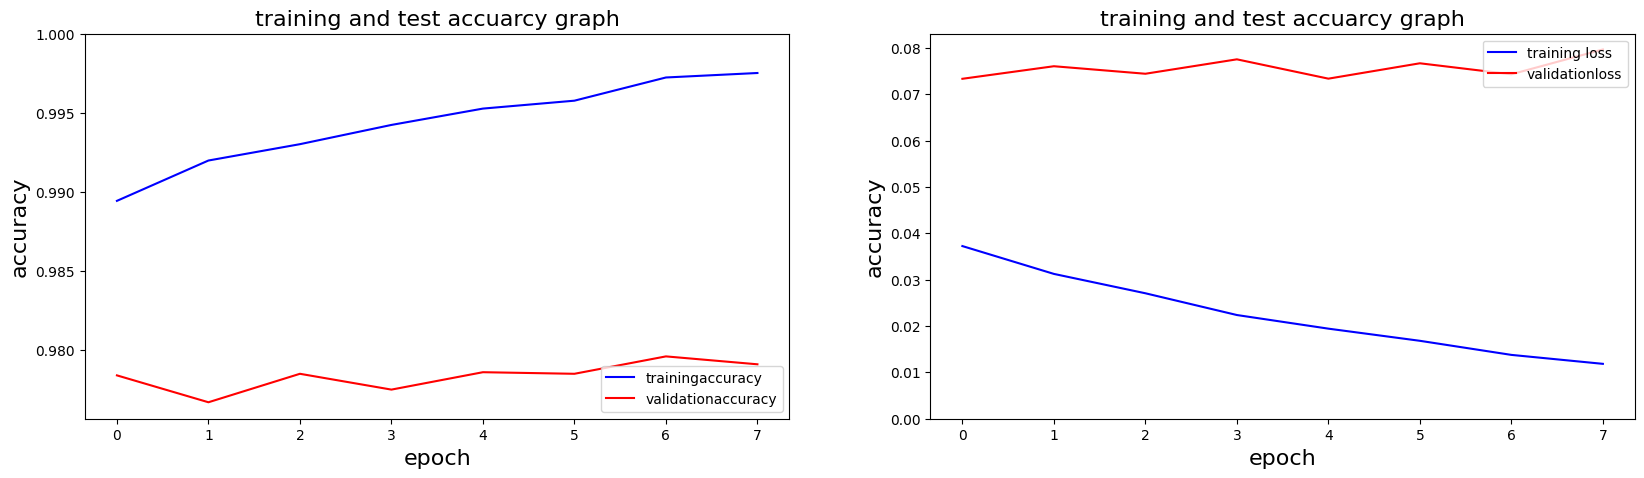

In [97]:
#accracy and loss chart
#accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b",label="trainingaccuracy")
plt.plot(history.history["val_accuracy"],color="r",label="validationaccuracy")
plt.legend(loc="lower right")
plt.xlabel("epoch",fontsize=16)
plt.ylabel("accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("training and test accuarcy graph", fontsize=16)
#loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color="b",label="training loss")
plt.plot(history.history["val_loss"],color="r",label="validationloss")
plt.legend(loc="upper right")
plt.xlabel("epoch",fontsize=16)
plt.ylabel("accuracy",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("training and test accuarcy graph", fontsize=16)



In [98]:
loss,precision,recall,acc=model.evaluate(xtest,ytest,verbose=False)
print(f"test accuracy:{round(acc*100,2)}")
print(f"test loss:{round(loss*100,2)}")
print(f"test precision:{round(precision*100,2)}")
print(f"test recall:{round(recall*100,2)}")#where round is to round off,  2 for decimal value

test accuracy:97.91
test loss:7.97
test precision:98.01
test recall:97.81


In [99]:
#precision and visualization

In [100]:
y_pred=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [101]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [102]:
if len(ytest.shape)>1 and ytest.shape[1]!=1:
    ytest=np.argmax(ytest,axis=1)

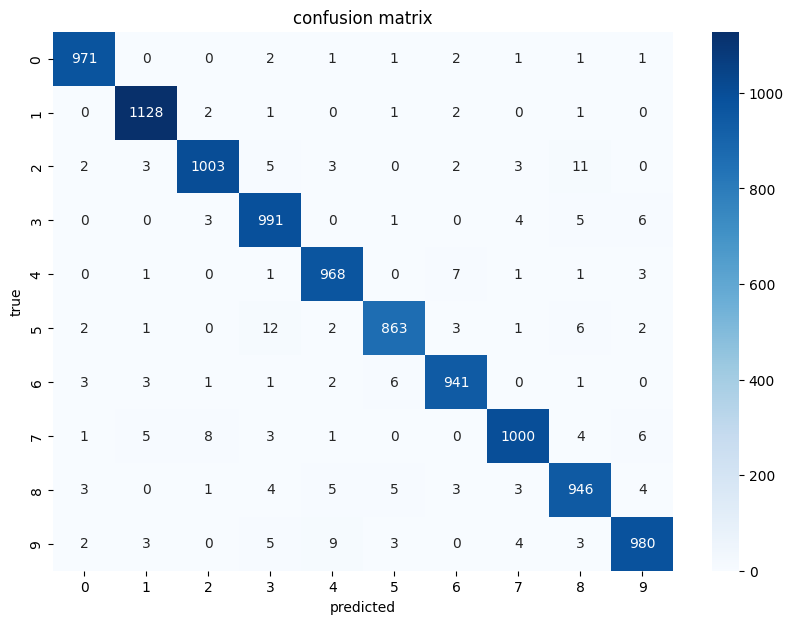

In [103]:
#heatmap+confusion matrix
cm=confusion_matrix(ytest,y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("confusion matrix")
plt.show()

In [104]:
#registering the model and predicting a randomly selected image from dataset

In [105]:
model.save("mnist_model.h5")

In [108]:
import random
random=random.randint(0,xtest.shape[0])
print(xtest[random])
test_image=xtest[random]
print(ytest[random])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

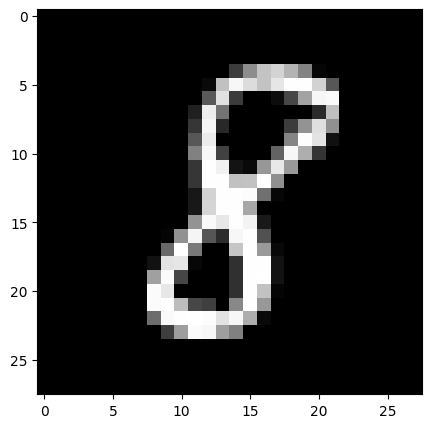

In [112]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap="grey")


In [113]:
test_data=xtest[random].reshape(1,28,28,1)

In [114]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [115]:
predicted_classes=np.argmax(probability)

In [116]:
print(f"predicted class:{predicted_classes}\nprobability value of predicted class:{np.max(probability,axis=-1)[0]}\nprobability values of other classes:{probability}")

predicted class:8
probability value of predicted class:0.9999977350234985
probability values of other classes:[[3.9597521e-09 4.5828480e-07 1.6813097e-07 5.6595150e-07 4.3747193e-09
  6.3651576e-08 1.0721667e-06 3.8016549e-13 9.9999774e-01 6.7162075e-11]]
